# Module 4 - Data Visualization

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
location = "DC_Properties.csv"
df = pd.read_csv(location)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = pd.read_csv("Pokemon.csv", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()

In [ ]:
#rename the pound/hashtag(#) column so it doesn't cause further issues
df.rename(columns={'#': 'Number'}, inplace =True)

In [6]:
#validate
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [ ]:
#set indices as Pokemon numbers
df.set_index('Number', inplace=True)
df.head()

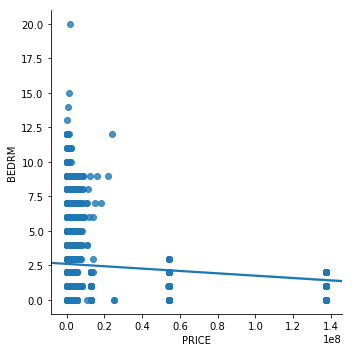

In [7]:
#make a scatterplot
sns.lmplot(x='PRICE', y='BEDRM', data=df)

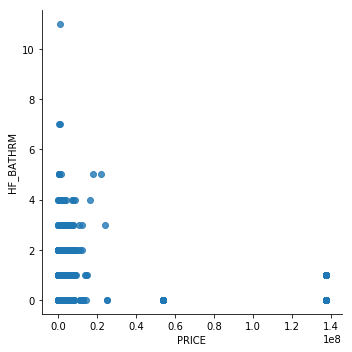

In [9]:
#add more details to scatterplot
sns.lmplot(x='PRICE', y='HF_BATHRM', data=df, 
           fit_reg=False) #remove regression line
           # hue='Stage')   #color by evolution stage

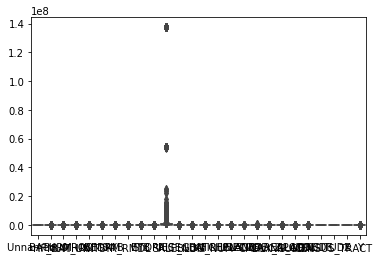

In [10]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

In [ ]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
stats_df.head()

In [ ]:
#boxplot for stats
sns.boxplot(data=stats_df)

In [ ]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Type 1', y='Attack', data=df)

In [ ]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [ ]:
#violin plot with Pokemon color palette
plt.subplots(figsize=(13,7))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

In [ ]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

In [ ]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,7))
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Attack by Type')

### Visualize all Types by Stat

In [ ]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(stats_df, 
                  id_vars=['Name', 'Type 1', 'Type 2'], #column to keep
                  var_name="Stat")

melt_df.head()

In [ ]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(stats_df.shape)
print(melt_df.shape)

In [ ]:
plt.figure(figsize=(10,6))

#swarm plot of Stats from melted dataframe
sns.swarmplot(x='Stat', y='value', 
              data=melt_df,
              hue='Type 1')

This swarm plot is a bit messy, let's clean it up.

In [ ]:
plt.figure(figsize=(13,7))

sns.swarmplot(x='Stat', y='value',
              data=melt_df,
              hue='Type 1', 
              dodge=True, #separate points on chart by hue
              palette=pkmn_type_colors)

#adjust the y-axis
plt.ylim(0,260)

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [ ]:
#show correlation of stats via heatmap
corr = stats_df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

In [ ]:
#create a histogram of the distribution of attack power
sns.distplot(df['Attack'])

In [ ]:
#create a bar plot of Type 1 frequency
sns.countplot(x='Type 1',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45)

In [ ]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='Type 1', y='Attack',
                   data=df,
                   hue='Stage', 
                   col='Stage',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

Source: https://elitedatascience.com/python-seaborn-tutorial